# IBM HR Analytics Employee Attrition & Performance

In [2]:
# import libraries
import numpy as np
from numpy import median
from scipy import stats
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline


from plotly import __version__
from plotly import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')
import os

In [3]:
# Read the file
df = pd.read_csv('data/HR-Employee-Attrition.csv')

In [4]:
# Shape of data
df.shape

(1470, 35)

In [5]:
# Data Types of Columns
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
# Set options to inspect all of the columns
pd.options.display.max_columns = 36 

# Inspect the structure of the dataframe
df.sample(5).transpose()

,501,258,699,500,945
Age,30,51,52,32,50
Attrition,No,No,No,No,No
BusinessTravel,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely
DailyRate,160,833,1053,646,1322
Department,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,3,1,1,9,28
Education,3,3,2,4,3
EducationField,Medical,Life Sciences,Life Sciences,Life Sciences,Life Sciences
EmployeeCount,1,1,1,1,1
EmployeeNumber,680,353,976,679,1317


In [7]:
df.index

RangeIndex(start=0, stop=1470, step=1)

In [8]:
df.values

array([[41, 'Yes', 'Travel_Rarely', ..., 4, 0, 5],
       [49, 'No', 'Travel_Frequently', ..., 7, 1, 7],
       [37, 'Yes', 'Travel_Rarely', ..., 0, 0, 0],
       ...,
       [27, 'No', 'Travel_Rarely', ..., 2, 0, 3],
       [49, 'No', 'Travel_Frequently', ..., 6, 0, 8],
       [34, 'No', 'Travel_Rarely', ..., 3, 1, 2]], dtype=object)

In [9]:
df.axes

[RangeIndex(start=0, stop=1470, step=1),
 Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
        'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
        'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
        'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
        'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
        'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
        'YearsWithCurrManager'],
       dtype='object')]

In [10]:
df.get_dtype_counts()

int64     26
object     9
dtype: int64

In [11]:
#Inspect the state of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [12]:
df.describe(include="all")

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


**Let's check weirdness on the dataset by looking some features**

In [13]:
df['TotalWorkingYears'][df['TotalWorkingYears'] < 0].sum()

0

There is no negative value in years. It makes sense. 

In [14]:
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

Marital status has really three unique values as shown on chart above. 

In [15]:
df['YearsAtCompany'][df['YearsAtCompany'] > 41].sum() 

0

I checked if there is a weird number for 'YearsAtCompany'. At most, one should have 40 years in a company. So, evertyhing seems goood. 

In [16]:
# Check for missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

This result shows that there is no missing value in the dataset. 

In [17]:
# Check for duplicate observations
df.duplicated().sum()

0

There is no duplicate value in the dataset.

In [18]:
# Reassign response variable
df['Attrition'] = df['Attrition'].apply(lambda x: 0 if x == 'No' else 1)

In [19]:
# Inspect useless features
df.nunique().sort_values()

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

In [20]:
# Drop useless features and rename the dataframe
df2 = df.drop(labels = ['Over18','StandardHours','EmployeeCount'], axis = 1)

In [21]:
# Moving Response Variable to the last column
front = df2['Attrition']
df2.drop(labels=['Attrition'], axis=1,inplace=True)
df2.insert(31,'Attrition',front)
df2.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,0


In [22]:
# Changing object types to categories
cols = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
for col in cols:
    df2[col] = df2[col].astype('category')

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
Age                         1470 non-null int64
BusinessTravel              1470 non-null category
DailyRate                   1470 non-null int64
Department                  1470 non-null category
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null category
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null category
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null category
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null category
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompanie

**Inspect values of categorical columns**

In [24]:
df2[cols].nunique()

BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
OverTime          2
dtype: int64

In [25]:
for col in cols:
    display(df2[col].value_counts())

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Male      882
Female    588
Name: Gender, dtype: int64

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

No     1054
Yes     416
Name: OverTime, dtype: int64

# Exploratory Data Analysis

### Introduction:

We have 32 features consisting of both categorical as well as the numerical features. Response variable is 'Attrition' of the employees which can 1 and 0 (representing 'Yes' and 'No' respectively). This is what we will predict.  

Now, I will try to analyze visually the trends in how and why employees are quitting their jobs. For that, I will deep dive into the details about features and their relationships between each other.

### Target Variable:

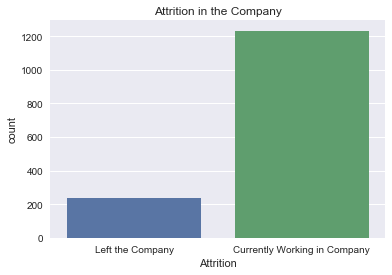

Currently Working in Company    1233
Left the Company                 237
Name: Attrition, dtype: int64

In [119]:
trgt = df2['Attrition'].apply(lambda x: 'Currently Working in Company' if x == 0 else 'Left the Company')
sns.countplot(trgt)
plt.title('Attrition in the Company')
plt.show()
trgt.value_counts()

In the company, there are 1470 employees. 237 employees who compose 16% of the total number of employee left the company for some reasons. Besides that, 1233 employee is currently continuing to work in the same company. 

### Features: 

First of all, I will code two functions to implement dataframe and graph on each feature of the dataset. 

In [27]:
# Create Feature Dataframe
def table_df(x): 
    """
    This function creates dataframe for each feature in the dataset
    """
    
    feature = df2.groupby(x).agg({'Attrition':['size', 'sum', 'mean']})
    feature.columns = [' '.join(col).strip() for col in feature.columns.values]
    feature = feature.reset_index()
    feature['Attrition mean'] = feature['Attrition mean']*100
    feature.columns = [x, 'Total Employee ', 'Attrition Number', 
                       '% of Attrition in the Relevant Group'] 
    feature['% of Attrition in the Company'] = (feature['Attrition Number'] / 237)*100
        
    return feature

In [28]:
# Create graph for each feature to compare its attrition in the company 

def graph_df(x, y = 'bar', z = 0):
    """
    This function creates graph for each feature in the dataset
    """
    
    feature = df2.groupby(x).agg({'Attrition':['size', 'sum', 'mean']})
    feature.columns = [' '.join(col).strip() for col in feature.columns.values]
    feature = feature.reset_index()
    feature['Attrition mean'] = feature['Attrition mean']*100
    feature.columns = [x, 'Total Employee', 'Attrition Number', 
                       '% of Attrition in the Relevant Group'] 
    
    fig0, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    feature.set_index(feature[x], drop=True, inplace=True)
    feature['Total Employee'].plot(kind = y, stacked = True, ax = ax1, 
                                   colormap = 'winter', rot = z)
    feature['% of Attrition in the Relevant Group'].plot(use_index = False, 
                                                         kind = 'line', ax = ax2, colormap='Spectral')
    plt.title('Attrition compared to' + " " + x  + " " + "Groups")
    ax1.set_xlabel(x)
    ax1.yaxis.label.set_color('blue')
    ax1.set_ylabel("Total Employee")
    ax2.set_ylabel("Attrition Percentage in the Relevant Group")
    ax2.yaxis.label.set_color('red')
    plt.tight_layout()
    plt.show()

**Age**

In [540]:
# Labeling age groups
table_df(x = 'Age')
bins = [17, 21, 25, 35, 60]
group_names = ['(18-21)', '(22-25)', '(26-35)', '(36-60)']
df2['Age'] = pd.cut(df2['Age'], bins, labels = group_names)

In [541]:
# Age Group & Attrition Table
table_df(x = 'Age')

,Age,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,(18-21),41,22,53.658537,9.282700
1,(22-25),82,22,26.829268,9.282700
2,(26-35),606,116,19.141914,48.945148
3,(36-60),741,77,10.391363,32.489451


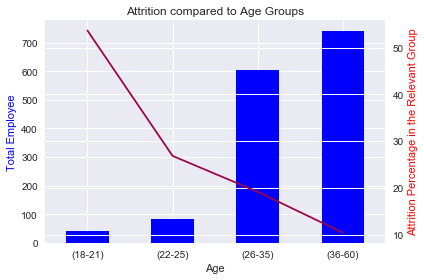

In [542]:
# Attrition Compared to Age Group Graph
graph_df(x = 'Age')

In **18-21 age group**, young employees are more likely to leave the company. Their attrition proportion to their age group is approximately 53.7% (22 out of 41) and that makes up 9% of all attrition (22 out of 237). 

If we evaluate overall attrition number in the company,  **26-35 age group's attrition number** is the highest comparing to other age groups. In this age group, we have 19.1 % of employee attrition(116 out 606). That makes up approximately 49% of all attrition in the company (116 out of 237). 

**35-60 age group** generally prefers to secure their job in the same company.

**Business Travel**

In [543]:
# Business Travel & Attrition Table
table_df(x = 'BusinessTravel')

,BusinessTravel,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Non-Travel,150,12,8.000000,5.063291
1,Travel_Frequently,277,69,24.909747,29.113924
2,Travel_Rarely,1043,156,14.956855,65.822785


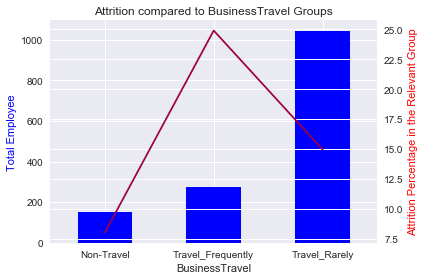

In [544]:
# Attrition compared to Business Travel Group Graph
graph_df(x = 'BusinessTravel')

In the company, most of the employee travel rarely or don't travel according to their job description. That group compose the 81.1% of entire company(1193). The rest of the company employees which is 19.9% of them has to travel frequently (277 out of 1470).  

The highest attrition number with 156 belongs to the **employees who travels rarely**. That is approximately 15% of employees in that group (156 out of 1043). But when you put this number overall attrition, it makes up 65.8% of all attrition in the company(156 out of 237).

if we look at the attrition percentage of relevant travel group, the **employees who are traveling frequently** are in the danger zone. Because they have the highest attrition proportion, which is 24.9%, in their individual travel group(69 out of 277). That group's attrition rate composes of the 29.1% of overall attrition in the company (69 out of 237).

**Employees who don't travel** in their current role have the lowest attrition rate, which is 8%.

**Department**

In [545]:
# Department & Attrition Table
table_df(x = 'Department')

,Department,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Human Resources,63,12,19.047619,5.063291
1,Research & Development,961,133,13.839750,56.118143
2,Sales,446,92,20.627803,38.818565


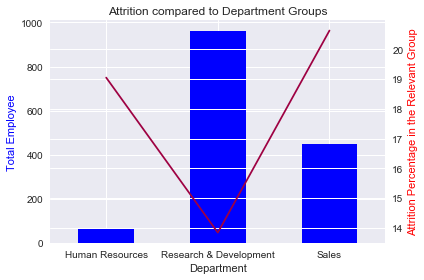

In [546]:
# Attrition compared to Department Graph
graph_df(x = 'Department')

There are three departments in the company. **Research & Development Department** has the most attrition number in the company. 13.8% of **Research & Development Department** employee left the organization. In numbers, it is equal to 133, which makes us the 56.1% of all attrition in the company. Actually, that attrition is a big number for company, but compared with other departments, **Research & Development Department** has the lowest attrition rate in itself as an individual department. 

**Sales Department** has mostly been affected by the attrition. Because 20.6% of its employees left the organization. This is the highest number compared to the other two departments. That attrition makes up 38.8% of the attrition in the company (92 out of 237). 

**Human Resources Department** follows the **Sales Department** in terms of being affected by attrition itself. 19% of that department employee left the company. But this is not that huge number in terms of whole attrition in company. **Human Resources Department** employee attrition makes up 5% of all attrition in the company (12 out of 237).

**Distance From Home**

In [548]:
# Labeling Distance From Home Groups
table_df(x = 'DistanceFromHome')
bins = [0, 3, 6, 10, 29]
group_names = ['1-3', '4-6', '7-10', '10+']
df2['DistanceFromHome'] = pd.cut(df2['DistanceFromHome'], bins, labels = group_names)

In [549]:
# Distance From Home Group & Attrition Table
table_df(x = 'DistanceFromHome')

,DistanceFromHome,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1-3,503,68,13.518887,28.691983
1,4-6,188,26,13.829787,10.970464
2,7-10,335,50,14.925373,21.097046
3,10+,444,93,20.945946,39.240506


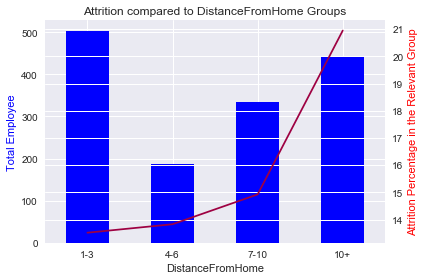

In [550]:
# Attrition compared to Distance From Home Graph
graph_df(x = 'DistanceFromHome')

**Employees whose homes are 1-3 miles far away from the company** compose approximately 1/3 of the whole company employee and their attrition rate is 28.7% of all company (68 out of 237).

Also, **employees whose homes are 10+ miles far away from the company** compose approximately the other 1/3 of the whole company employee and their attrition rate is 39.2% of all company (93 out of 237).

**Attrition rate within its own distance group seems to increase as the distance from home increases.** 

**Education**

In [551]:
# Labeling education levels
table_df(x = 'Education')
df2['Education'] = df2['Education'].map({1:'Below College', 2:'College', 
                                         3:'Bachelor', 4:'Master', 5:'Doctor'})

In [552]:
# Education Level & Attrition Table
table_df(x = 'Education')

,Education,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Bachelor,572,99,17.307692,41.772152
1,Below College,170,31,18.235294,13.080169
2,College,282,44,15.602837,18.565401
3,Doctor,48,5,10.416667,2.109705
4,Master,398,58,14.572864,24.472574


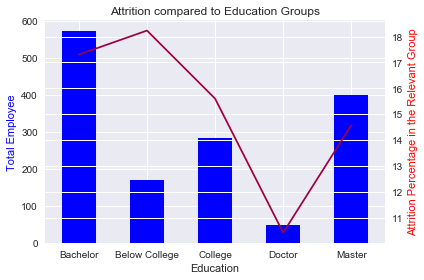

In [553]:
# Attrition compared to Education Level Graph
graph_df(x = 'Education')

**Employees who have bachelor degree** have the most attrition number (99 employees) in the company. That makes up 41.8% of all attrition in the company. **Employees who have Ph.D. degree** composes the least attrition number in the company.

**Employees who have the master, college, and below college degrees** are follower of **employees who have bachelor degrees** in terms of the attrition number in the company respectively.

**Education Field**

In [555]:
# Education Field & Attrition Table
table_df(x = 'EducationField')

,EducationField,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Human Resources,27,7,25.925926,2.953586
1,Life Sciences,606,89,14.686469,37.552743
2,Marketing,159,35,22.012579,14.767932
3,Medical,464,63,13.577586,26.582278
4,Other,82,11,13.414634,4.641350
5,Technical Degree,132,32,24.242424,13.502110


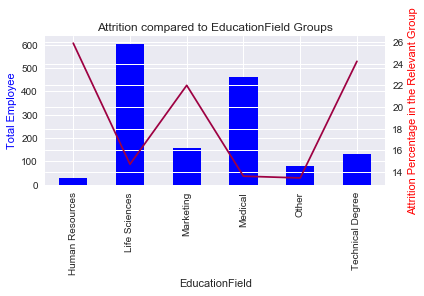

In [560]:
# Attrition compared to Education Field Graph
graph_df(x = 'EducationField', z = 90)

**Employees who have Life Science** education level have the most attrition number which makes up the 37.5% of all attrition (89 out of 237). But that composes only 14.7% of attrition within Life Sciences field. 

**Medical** education level have the second highest attrition number which makes up the 13.57% of all attrition (63 out of 237). But that composes only 14.7% of attrition within Life Sciences field. 

Besides that, **Human Resources, Technical Degree, and Marketing** fields are mostly affected by the attrition respectively. Their approximately 22-26% employees left the company. 

**Environment Satisfaction**

In [561]:
# Labeling environment satisfaction
table_df(x = 'EnvironmentSatisfaction')
df2['EnvironmentSatisfaction'] = df2['EnvironmentSatisfaction'].map({1:'Low', 2:'Medium', 
                                                                     3:'High', 4:'Very High'})

In [562]:
# Environment & Attrition Table
table_df(x = 'EnvironmentSatisfaction')

,EnvironmentSatisfaction,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,High,453,62,13.686534,26.160338
1,Low,284,72,25.352113,30.379747
2,Medium,287,43,14.982578,18.143460
3,Very High,446,60,13.452915,25.316456


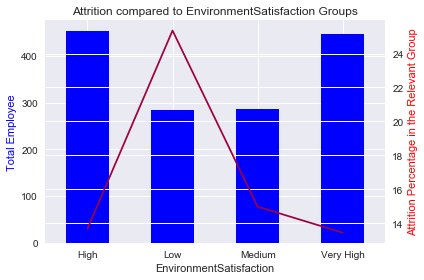

In [564]:
# Attrition compared to Environment Satisfaction Graph
graph_df(x = 'EnvironmentSatisfaction')

As it may be expected, there is a high attrition rate in the **low satisfaction environment**. That composes the 30.4 % of the whole company's attrition.

Shockingly, in the **high and  very high satisfaction environment**, there are still 13.7 % of the these each group's employees leave the company. That attrition composes of the 51.5 % of the whole company's attrition. This result might tell us that environment satisfaction is not the one of  the main reasons for attrition in the company. 

**Gender**

In [565]:
# Gender & Attrition Table
table_df(x = 'Gender')

,Gender,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Female,588,87,14.795918,36.708861
1,Male,882,150,17.006803,63.291139


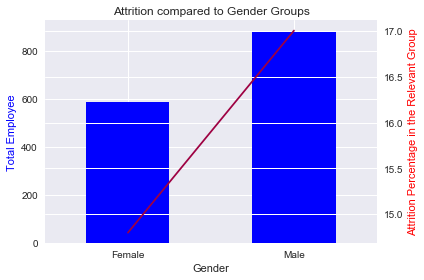

In [566]:
# Attrition compared to Gender Graph
graph_df(x = 'Gender')

**Male employees** are more likely to leave the company than **female employees**.

**Job Involvement**

In [570]:
# Labeling Job Involvement Groups
table_df(x = 'JobInvolvement')
df2['JobInvolvement'] = df2['JobInvolvement'].map({1:'Low', 2:'Medium', 
                                                   3:'High', 4:'Very High'})

In [571]:
# Job Involvement & Attrition Table
table_df(x = 'JobInvolvement')

,JobInvolvement,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,High,868,125,14.400922,52.742616
1,Low,83,28,33.734940,11.814346
2,Medium,375,71,18.933333,29.957806
3,Very High,144,13,9.027778,5.485232


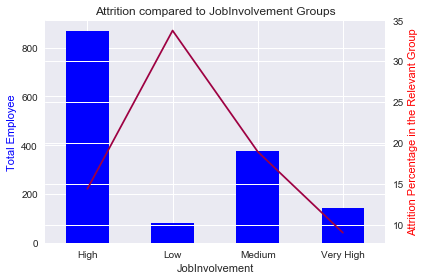

In [573]:
# Attrition compared to Job Involvement Graph
graph_df(x = 'JobInvolvement')

59% of all employee's job involvement in the company is in the **high** category(868 out of 1470). The highest attrition number is also observed in high job involvement category. 125 employees in this group, which composes the 52.7% of all attrition, left the company. But that is only 14.4% of high job involvement category. 

**Medium** job involvement category is following the **high** category group in attrition number with 71 employee. 

**Low** job involvement category has the highest employee leaving proportion within individual category when it is compared to the other categories. 33.7% of **Low** Job involvement group left the company. 

**Job Level**

In [579]:
# Labeling job levels
table_df(x = 'JobLevel')
df2['JobLevel'] = df2['JobLevel'].map({1:'Level-1', 2:'Level-2', 
                                       3:'Level-3', 4:'Level-4', 5:'Level-5'})

In [580]:
# Job Level & Attrition Table
table_df(x = 'JobLevel')

,JobLevel,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Level-1,543,143,26.335175,60.337553
1,Level-2,534,52,9.737828,21.940928
2,Level-3,218,32,14.678899,13.502110
3,Level-4,106,5,4.716981,2.109705
4,Level-5,69,5,7.246377,2.109705


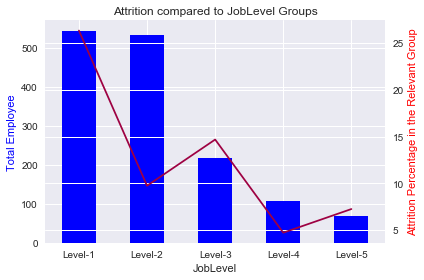

In [581]:
# Attrition compared to Job Level Graph
graph_df(x = 'JobLevel')

With an increase in job level, there is a decrease in attrition number throughout the company. The highest attrition is observed in the **job level-1**. 143 employee in the job level-1, who compose the 60.3% of all attrition, left the company. 

**Job Role**

In [582]:
# Job Role & Attrition Table
table_df(x = 'JobRole')

,JobRole,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Healthcare Representative,131,9,6.870229,3.797468
1,Human Resources,52,12,23.076923,5.063291
2,Laboratory Technician,259,62,23.938224,26.160338
3,Manager,102,5,4.901961,2.109705
4,Manufacturing Director,145,10,6.896552,4.219409
5,Research Director,80,2,2.500000,0.843882
6,Research Scientist,292,47,16.095890,19.831224
7,Sales Executive,326,57,17.484663,24.050633
8,Sales Representative,83,33,39.759036,13.924051


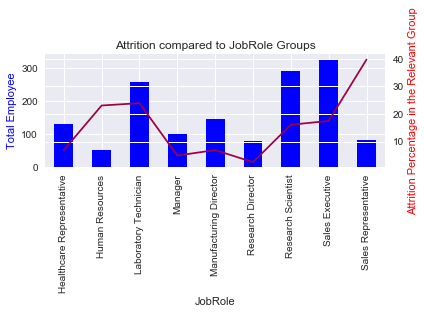

In [586]:
# Attrition compared to Job Role Graph
graph_df(x = 'JobRole', z = 90)

**Laboratory Technician** has the most attrition number with the 26.2% of all attrition in the company (62 out of 237 employees). **Sales Executive** and **Research Scientist** are following the **Laboratory Technician** in attrition throughout the company with the 57 and 47 employees respectively. Those both job roles' attrition compose 44% of whole company's attrition. 

**Sales Representative** role has been affected mostly by the attrition. Sales Representative has lost approximately 40% of its' employee. **Laboratory Technician** and **Human Resources** followed it in terms of losing employee as a job role.

On the other hand, **Research Director** job role has the lowest attrition number not only in the company (2.5%) but only within its own job role(0.8%). 

**Job Satisfaction**

In [589]:
# Labeling Job Role 
table_df(x = 'JobSatisfaction')
df2['JobSatisfaction'] = df2['JobSatisfaction'].map({1:'Low', 2:'Medium',
                                                     3:'High', 4:'Very High'})                                               

In [590]:
# Job Satisfaction & Attrition Table
table_df(x = 'JobSatisfaction')

,JobSatisfaction,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,High,442,73,16.515837,30.801688
1,Low,289,66,22.837370,27.848101
2,Medium,280,46,16.428571,19.409283
3,Very High,459,52,11.328976,21.940928


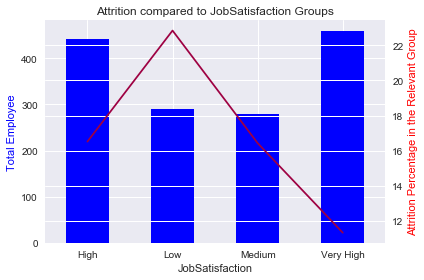

In [591]:
# Attrition compared to Job Satisfaction
graph_df(x = 'JobSatisfaction')

In **high** job satisfaction, surprisingly employees leaves the company most and their attrition composes 30.8% of company's attrition. From this picture, I assume that job satisfaction should not be the main reason for employees to leave the company. 

As it may be expected, in **low** job satisfaction, employees leave the company more than other groups except **high** satisfaction. They compose 27.8% of all attrition in the company. 

**Marital Status**

In [594]:
# Job Satisfaction & Attrition Table
table_df(x = 'MaritalStatus')

,MaritalStatus,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Divorced,327,33,10.091743,13.924051
1,Married,673,84,12.481426,35.443038
2,Single,470,120,25.531915,50.632911


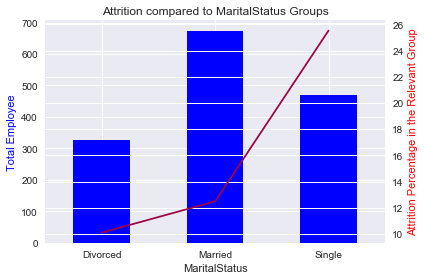

In [595]:
# Attrition compared to Job Satisfaction
graph_df(x = 'MaritalStatus')

**Single** employees are more likely to leave the company. They have the highest attrition number and compose of the 50.6% employees who left the company. **Married** and **Divorced** employees are the followers of **Single** employees in the attrition number of the company respectively. 

**Monthly Income**

In [29]:
# Labeling Monthly Income Level
table_df(x = "MonthlyIncome")
bins = [1000, 2000, 3000, 4000, 5000, 7500, 9000, 11000, 15000, 20000]
group_names = ['1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-7500', 
               '7500-9000', '9000-11000', '11000-15000', '15000-20000']             
df2["MonthlyIncome"] = pd.cut(df2["MonthlyIncome"], bins, labels = group_names)

In [30]:
# Monthly Income & Attrition Table
table_df(x = "MonthlyIncome")

,MonthlyIncome,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1000-2000,33,18,54.545455,7.594937
1,2000-3000,362,95,26.243094,40.084388
2,3000-4000,148,24,16.216216,10.126582
3,4000-5000,206,26,12.621359,10.970464
4,5000-7500,310,30,9.677419,12.658228
5,7500-9000,78,10,12.820513,4.219409
6,9000-11000,118,22,18.644068,9.282700
7,11000-15000,82,7,8.536585,2.953586
8,15000-20000,133,5,3.759398,2.109705


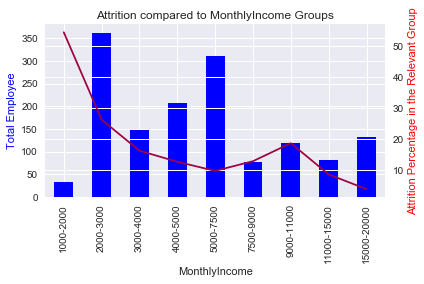

In [31]:
# Attrition compared to Monthly Income Level Graph
graph_df(x = "MonthlyIncome", z = 90)

**2000-3000 dolar monthly income** level, there is a high  attrition and it compose the 40% of attrition in the company. 

**1000-2000 dolar monthly income** level, there is a high  attrition in its own income group level, which is 54.5%. 

As the mothly income increase, it is observed that there is a decrease in attrition. But, in **9000-11000 dolar monthly income** level, there is a rise in  attrition of its own monthly income group level. 

**Numbers Companies Worked**

In [38]:
# Numbers Companied Worked & Attrition Table
table_df(x = 'NumCompaniesWorked')

,NumCompaniesWorked,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,197,23,11.675127,9.704641
1,1,521,98,18.809981,41.350211
2,2,146,16,10.958904,6.751055
3,3,159,16,10.062893,6.751055
4,4,139,17,12.230216,7.172996
5,5,63,16,25.396825,6.751055
6,6,70,16,22.857143,6.751055
7,7,74,17,22.972973,7.172996
8,8,49,6,12.244898,2.531646
9,9,52,12,23.076923,5.063291


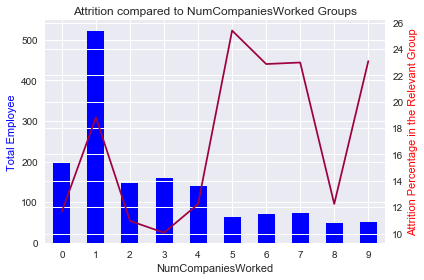

In [42]:
# Attrition compared to Numbers of Companies Worked Graph
graph_df(x = 'NumCompaniesWorked')

If employees have **one company experience** before current company, they are more likely to leave the company. They have the highest attrition number and compose of 41.3% all attrition in the company. Besides, if **employees don't have any experience** in other company, they have the second most attrition number.  

Also, employees, who has more experience such as **working in 5,6,7, and 9 companies** before the current company, have the highest attrition in their individual experienced group. 

**Over Time**

In [43]:
# Numbers Companied Worked & Attrition Table
table_df(x = 'OverTime')

,OverTime,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,No,1054,110,10.436433,46.413502
1,Yes,416,127,30.528846,53.586498


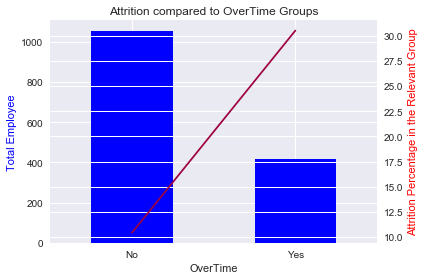

In [44]:
# Attrition compared to Numbers of Companies Worked Graph
graph_df(x = 'OverTime')

28.3% of employees have the over time work in the company and they have higher attrition number than employees who don't have. There is not a significant difference between these two groups' attrition number. But if you compare individually both groups, over time employees are much more likely to leave the company.

**Percent Salary Hike**

In [49]:
# Percent Salary Hike & Attrition Table
table_df(x = 'PercentSalaryHike')
bins = [10, 14, 18, 22, 25]
group_names = ['11-14', '15-18', '19-22', '23-25']             
df2['PercentSalaryHike'] = pd.cut(df2['PercentSalaryHike'], bins, labels = group_names)

In [50]:
# Percent Salary Hike & Attrition Table
table_df(x = 'PercentSalaryHike')

,PercentSalaryHike,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,11-14,818,132,16.136919,55.696203
1,15-18,350,59,16.857143,24.894515
2,19-22,235,33,14.042553,13.924051
3,23-25,67,13,19.402985,5.485232


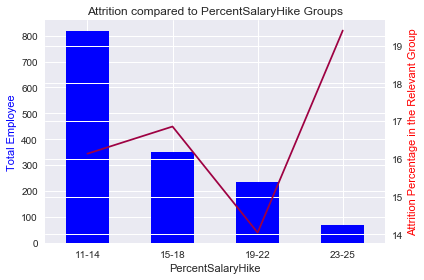

In [51]:
# Attrition compared to Percent Salary Hike
graph_df(x = 'PercentSalaryHike')

As it may be expected, the higher percent salary hike is, the more employees are likely and willingly to stay in the current company. The employees who have the highest percent salary hikes are more likely to leave the company. The reason for that might be due to the fact that they are more qualified and have the chance to find better position in another companies or due to the retirement. 

**Performance Rating**

In [54]:
# Performance Rating & Attrition Table
table_df(x = 'PerformanceRating')

,PerformanceRating,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,3,1244,200,16.077170,84.388186
1,4,226,37,16.371681,15.611814


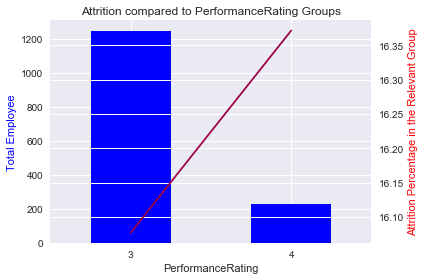

In [55]:
# Attrition compared to Performance Rating
graph_df(x = 'PerformanceRating')

Performance rating has two category such as 3 and 4. Not surprisingly, **performance rating 3 group** has the highest attrition number and compose 84.4% of all attrition in the company (200 out of 237 employees). 

**Relationship Satisfaction**

In [57]:
# Labeling Relationship Satisfaction Levels
table_df(x = 'RelationshipSatisfaction')
df2['RelationshipSatisfaction'] = df2['RelationshipSatisfaction'].map({1:'Low', 2:'Medium', 
                                                                       3:'High', 4:'Very High'})

In [58]:
# Relationship & Attrition Table
table_df(x = 'RelationshipSatisfaction')

,RelationshipSatisfaction,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,High,459,71,15.468410,29.957806
1,Low,276,57,20.652174,24.050633
2,Medium,303,45,14.851485,18.987342
3,Very High,432,64,14.814815,27.004219


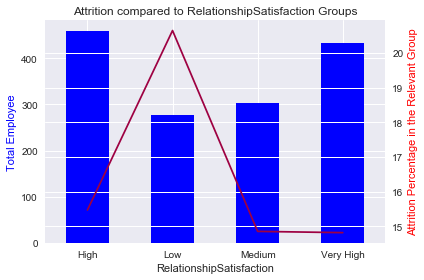

In [59]:
# Attrition compared to Relationship Satisfaction Graph
graph_df(x = 'RelationshipSatisfaction')

Relationship satisfaction is aligned with high and very high in the company. But, still **High** and **very high** relationship satisfaction level have the most attrition number respectively and compose of 52.7% all attrition in the company. 

Beside that, the highest attrition percentage in the satisfaction group is **low** as it might be expected (20.7% of attrition in the low relationship satisfaction level. 

**Stock Option Level**

In [62]:
# Relationship & Attrition Table
table_df(x = 'StockOptionLevel')

,StockOptionLevel,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,631,154,24.405705,64.978903
1,1,596,56,9.395973,23.628692
2,2,158,12,7.594937,5.063291
3,3,85,15,17.647059,6.329114


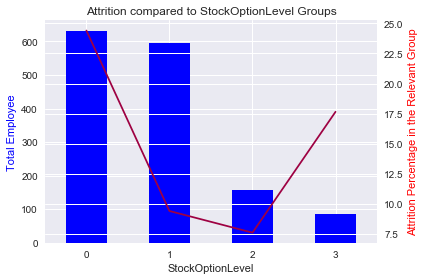

In [63]:
# Attrition compared to Stock Option Level Graph
graph_df(x = 'StockOptionLevel')

If **stock option level** is 0, there occurs a huge attrition in the company and it composes the 65% of the all attrition in the company. Besides, as the stock option level increase, there is a decrease in attrition number. 

**Total Working Years**

In [122]:
# Total Working Years & Attrition Table
table_df(x = 'TotalWorkingYears')
bins = [0, 1, 5, 10, 15, 20, 40]
group_names = ['1', '2-5', '6-10', '11-15', '16-20', '20+']             
df2['TotalWorkingYears'] = pd.cut(df2['TotalWorkingYears'], bins, labels = group_names, 
                                  include_lowest = True)

In [123]:
# Total Working Years & Attrition Table
table_df(x = 'TotalWorkingYears')

,TotalWorkingYears,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1,92,45,48.913043,18.987342
1,2-5,224,46,20.535714,19.409283
2,6-10,607,91,14.991763,38.396624
3,11-15,191,24,12.565445,10.126582
4,16-20,149,15,10.067114,6.329114
5,20+,207,16,7.729469,6.751055


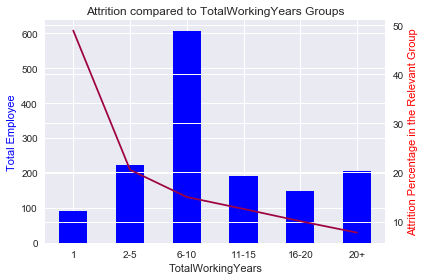

In [124]:
graph_df(x = 'TotalWorkingYears')

**Employees who have one year or less working experience** are more likely to leave the company and compose the 18.98% of all attrition throughout the company. In addition to that, **employees who have 6-10 years experience** have also second highest attrition percentage throughout the company and it compose the 38.4% of all attrition. 

**Training Times Last Year**

In [125]:
# Training Times Last Year & Attrition Table
table_df(x = 'TrainingTimesLastYear')

,TrainingTimesLastYear,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,54,15,27.777778,6.329114
1,1,71,9,12.676056,3.797468
2,2,547,98,17.915905,41.350211
3,3,491,69,14.052953,29.113924
4,4,123,26,21.138211,10.970464
5,5,119,14,11.764706,5.907173
6,6,65,6,9.230769,2.531646


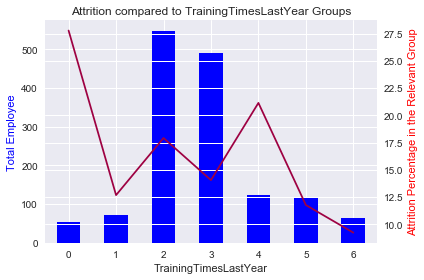

In [126]:
# Attrition compared to Training Times Last Year Graph
graph_df(x = 'TrainingTimesLastYear')

Employees who has **2 and 3 times training last year** has the most attrition number respectively and both of their attrition compose the 70.5% of all attrition in the company. Employees who don't have training time beforehand has the highest attrition number in its individual group. 

**Work Life Balance**

In [82]:
# Labeling Work Life Balance Groups
table_df(x = 'WorkLifeBalance')
df2['WorkLifeBalance'] = df2['WorkLifeBalance'].map({1:'Bad', 2:'Good', 
                                                     3:'Better', 4:'Best'})

In [83]:
# Work Life Balance & Attrition Table
table_df(x = 'WorkLifeBalance')

,WorkLifeBalance,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Bad,80,25,31.250000,10.548523
1,Best,153,27,17.647059,11.392405
2,Better,893,127,14.221725,53.586498
3,Good,344,58,16.860465,24.472574


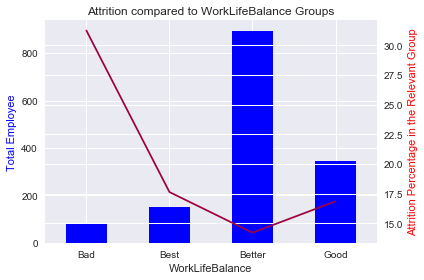

In [84]:
# Attrition compared to Work Life Balance Graph
graph_df(x = 'WorkLifeBalance')

In general, work life balance is satisfactorily good throughout the company. But, we have the highest attrition number and percentage throughout the company. 

Besides, bad work life balance group has highest attrition percentage in its individual group. 

**Years at Company**

In [127]:
# Labeling Years at Company Groups
table_df(x = 'YearsAtCompany')
bins = [0, 1, 5, 10, 40]
group_names = ['1', '2-5', '6-10', '10+']             
df2['YearsAtCompany'] = pd.cut(df2['YearsAtCompany'], bins, labels = group_names, 
                               include_lowest = True)

In [128]:
# Years at Company & Attrition Table
table_df(x = 'YearsAtCompany')

,YearsAtCompany,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1,215,75,34.883721,31.645570
1,2-5,561,87,15.508021,36.708861
2,6-10,448,55,12.276786,23.206751
3,10+,246,20,8.130081,8.438819


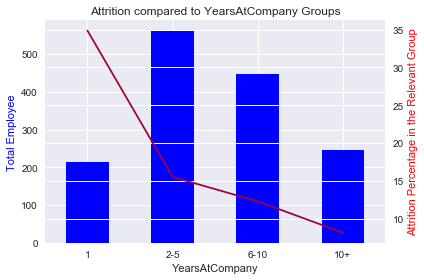

In [129]:
# Years at Company & Attrition Graph 
graph_df(x = 'YearsAtCompany')

Employees who has one year or less working experience in the company has the highest attrition percentage in its individual experience group (34.9% of attrition in the relavant group). Besides that highest attrition number, which is 87 employee, is in the 2-5 years working experience at the company and that composes of the 36.7 % of all attrition in the company. 

**Years in Current Role**

In [132]:
# Labeling Years in Current Role Groups
table_df(x = 'YearsInCurrentRole')
bins = [0, 1, 4, 6, 7, 10, 18]
group_names = ['1', '2-4', '5-6', '7', '8-10', '10+']             
df2['YearsInCurrentRole'] = pd.cut(df2['YearsInCurrentRole'], bins, labels = group_names, 
                                   include_lowest = True)

In [133]:
# Years at Company & Attrition Table
table_df(x = 'YearsAtCompany')

,YearsAtCompany,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1,215,75,34.883721,31.645570
1,2-5,561,87,15.508021,36.708861
2,6-10,448,55,12.276786,23.206751
3,10+,246,20,8.130081,8.438819


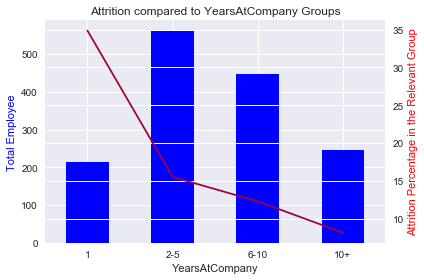

In [134]:
# Years in Current Role & Attrition Graph 
graph_df(x = 'YearsAtCompany')

Employees who don't fullfill their first year and in their first year in their current role are more likely to leave the company. That might be result of challenge or not satisfied with the current role. 

Employees who have 2-5 years experience in that company compose of the highes attrition percentage and number in the company. 

Besides that, after years in current role, employees are willing to leave the company. That might be result of looking for better opportunities in other companies. 

**Years Since Last Promotion**

In [135]:
# Labeling Years in Current Role Groups
table_df(x = 'YearsSinceLastPromotion')
bins = [0, 1, 2, 3, 4, 7, 8, 16]
group_names = ['0', '1', '2', '3', '4-6', '7', '8+']             
df2['YearsSinceLastPromotion'] = pd.cut(df2['YearsSinceLastPromotion'], bins, labels = group_names, 
                                        include_lowest = True, right = False)

In [136]:
# Years Since Last Promotion & Attrition Table
table_df(x = 'YearsSinceLastPromotion')

,YearsSinceLastPromotion,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,581,110,18.932874,46.413502
1,1,357,49,13.725490,20.675105
2,2,159,27,16.981132,11.392405
3,3,52,9,17.307692,3.797468
4,4-6,138,13,9.420290,5.485232
5,7,76,16,21.052632,6.751055
6,8+,107,13,12.149533,5.485232


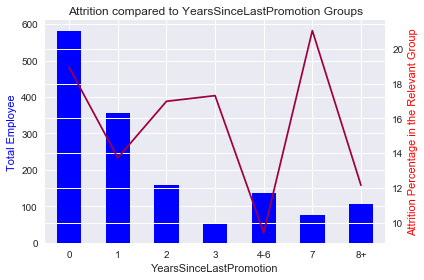

In [137]:
# Years Since Last Promotion & Attrition Graph
graph_df(x = 'YearsSinceLastPromotion')

Employees who don't fulfill his one year since the last promotion in the company are more likely to leave the company(46.4% of all attrition). And employees who have one and two years experience in the current company since the last promotion have the highest attrition number after the above group in the company respectively. 

Strangely, 7 years since last promotion has the higest attrition in its individual group.

**Years with Current Manager**

In [138]:
# Labeling Years with Current Manager Groups
table_df(x = 'YearsWithCurrManager')
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 18]
group_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10+']             
df2['YearsWithCurrManager'] = pd.cut(df2['YearsWithCurrManager'], bins, labels = group_names, 
                                     include_lowest = True, right = False)

In [139]:
# Years with Current Manager & Attrition Table
table_df(x = 'YearsWithCurrManager')

,YearsWithCurrManager,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,263,85,32.319392,35.864979
1,1,76,11,14.473684,4.641350
2,2,344,50,14.534884,21.097046
3,3,142,19,13.380282,8.016878
4,4,98,11,11.224490,4.641350
5,5,31,4,12.903226,1.687764
6,6,29,4,13.793103,1.687764
7,7,216,31,14.351852,13.080169
8,8,107,10,9.345794,4.219409
9,9,64,6,9.375000,2.531646


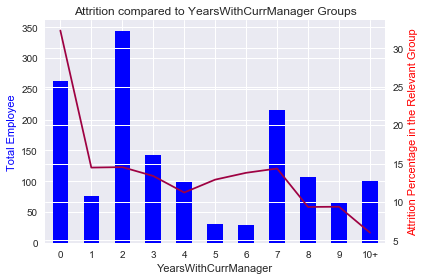

In [140]:
# Years with Current Manager & Attrition Graph
graph_df(x = 'YearsWithCurrManager')

Most of the employee quit the company before completing their first year with their current manager. Other group who leaves the company most is the ones who work two years with current manager.

**Other Features**

I also checked the 'Employee Number', 'Daily Rate', 'Hourly Rate' and 'Monthly Rate' features as I did the in previous features of dataset. But there is nothing significant to comment or visualize about these features. For that reason, I didn't include them in my notebook.

### Feature/Variable Relationships:

Here we will take a look at how variables related to each other. There are various methods/visualizations for this. I will use correlation matrix (heat map) for this purpose. 

`Correlation means association - more precisely it is a measure of the extent to which two variables are related. There are three possible results of a correlational study: a positive correlation, a negative correlation, and no correlation.
A positive correlation is a relationship between two variables in which both variables either increase or decrease at the same time. An example would be height and weight. Taller people tend to be heavier.
A negative correlation is a relationship between two variables in which an increase in one variable is associated with a decrease in the other. An example would be height above sea level and temperature. As you climb the mountain (increase in height) it gets colder (decrease in temperature).
A zero correlation exists when there is no relationship between two variables. For example their is no relationship between the amount of tea drunk and level of intelligence.`

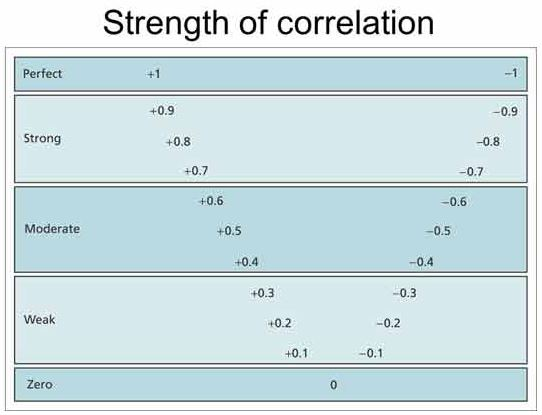

#### Correlation Matrix

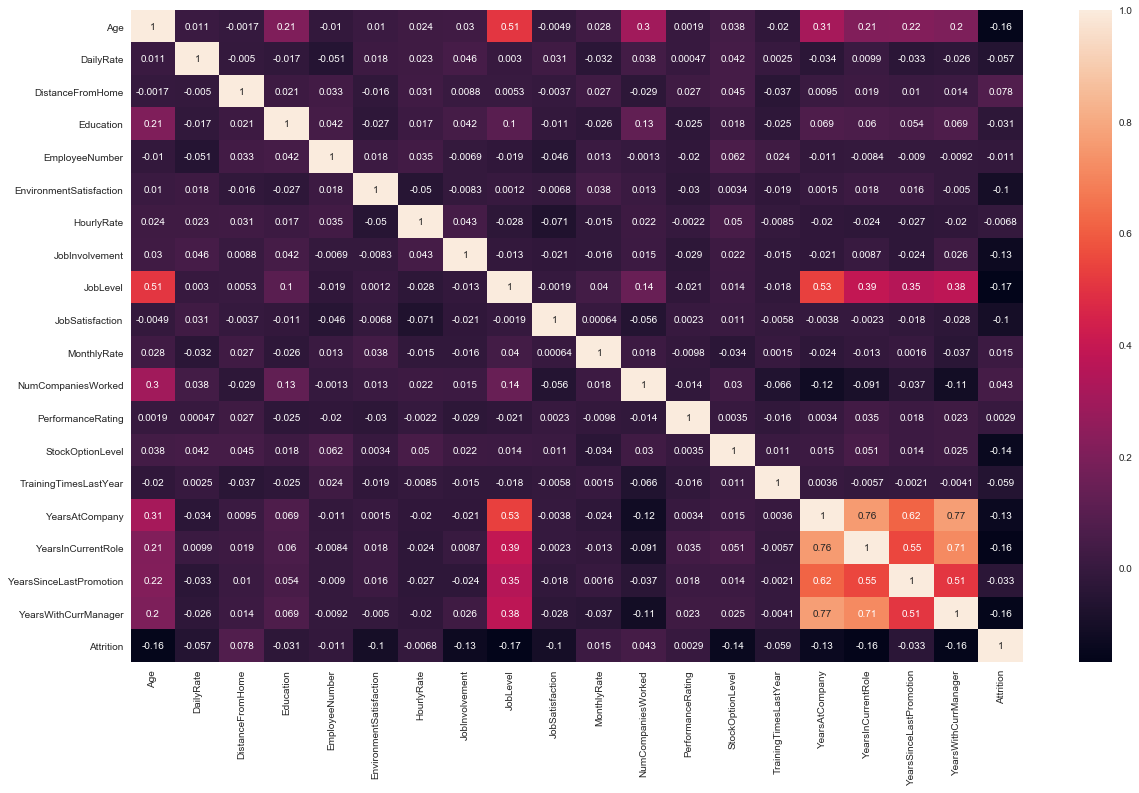

In [92]:
corr_matrix = df2.corr()
f , ax = plt.subplots(figsize=(20,12))
sns.heatmap(corr_matrix, vmax=1, annot=True)

Based on the fact which is given strength of correlation chart, we can identify the features which have strong, moderate, weak and zero correlations between each other. I will just outline the strong and moderate correlations here. 

**Features which have strong correlations:**

Percent Salary Hike and Performance Rating,

Total Working Years, Monthly Income and Job Level,

Years at Company, Years with Current Manager, and Years in Current Role, 

**Features which have moderate correlations:**

Age has moderate correlation with Total Working Years, Monthly Income, and Job Level,

Job Level has moderate correlation with Years at Company and Age,

Total Working Years has moderate correlation with Years with Current Manager, Years Since Last Promotion, Years in Current Role, Years at Company, and Age,

Years at Company has moderate correlation with Years Since Last Promotion, Total Working Years, Monthly Income, Job Level,

Years in Current Role has moderate correlation with Years Since Last Promotion, Total Working Years, 

Years Since Last Promotion has moderate correlation with Years with Current Manager, Years in Current Role, Years at Company, Total Working Years, 

Years with Current Manager has moderate correlation with Years Since Last Promotion, Total Working Years.

---
Generally, for the training model, we don't select features that have a strong correlation because it will have multicollinearity problem. Heatmap is a good way to detect this kind of situation. In this case, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion and YearWithCurrManager have strong correlations with each other which we should keep in our mind in further steps. Besides, that does not mean that is always case. We should try each variable and select the features which will give the best results in the model. 

## Hypothesis Testing (Examining Attrition in Gender throughout the company)

### 1. Selecting appropriate test

In [29]:
# Gender & Attrition Table
table_df(x = 'Gender')

,Gender,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Female,588,87,14.795918,36.708861
1,Male,882,150,17.006803,63.291139


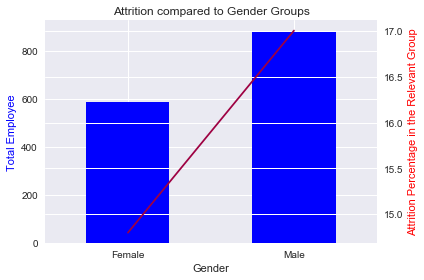

In [30]:
# Attrition compared to Gender Graph
graph_df(x = 'Gender')

Since the rate of attrition for two groups is compared, a two-proportion z-test is appropriate. Central Limit Theorem (CLT) states that regardless of the population, the distribution of sample averages tends to be normal. This holds for sample sizes greater than or equal to 30. Since the size of the data is big enough and 'female' and 'male' attrition  randomly to the resumes when presented to the employer, CLT could be applied here assuming that samples are respresenting the population.

### 2. The Null and Alternate Hypotheses

As observed above, it is obvious that male attrition is more than female's attrition but is the difference significant? Here is the important point to define the null and alternative hypothesis: 

In the context of provided information, the alternative hypothesis assumes that male attrition is pervasive enough to be a factor in attrition throughout the company.

Null Hypothesis: There is no difference in the proportion of attrition for male and female employees in the company.

$$H_0: \hat p_{male\_attrition} - \hat p_{female\_attrition} = 0$$

Alternative Hypothesis: There is a significant difference in the proportion of attrition for male and female employees in the company.

$$H_a: {\hat p_{male\_attrition}} - {\hat p_{female\_attrition}} \neq 0$$
Significance Level: 95% Confidence:

### 3. The Frequentist Statistical Approach 

In [26]:
# Assign female and  male into variables
female = df2[df2['Gender'] == 'Female']
male = df2[df2['Gender'] == 'Male']

# Find the mean for female and male employees attrition
female_attrition_mean = female['Attrition'].mean()
male_attrition_mean = male['Attrition'].mean()
print ('Black mean: {}'.format(female_attrition_mean))
print ('White mean: {}'.format(male_attrition_mean))

# Find the difference of female and male employees attrition
diff_mean = male_attrition_mean - female_attrition_mean
print ('Difference of mean between male and employees attrition: {}'.format(diff_mean))

Black mean: 0.14795918367346939
White mean: 0.17006802721088435
Difference of mean between male and employees attrition: 0.022108843537414963


**z-score**

In [27]:
# Compute z-score
male_attrition = np.sum(male['Attrition'])
female_attrition = np.sum(female['Attrition'])
male_ln = len(male)
female_ln = len(female)            
phat = (male_attrition + female_attrition) / (male_ln + female_ln)
z = (diff_mean) / np.sqrt(phat * (1 - phat) * (( 1/ float(male_ln)) + (1/float(female_ln))))
print ('z score:{}'.format(z))

z score:1.1292547809155016


**p-value**

In [28]:
# Compute p-value
p = stats.norm.cdf(-z)*2
print ('p-value:{}'.format(p))

p-value:0.2587903704911598


**Margin of error**

In [29]:
# Compute margin of error
moe = 1.96 * np.sqrt(phat * (1 - phat) * (( 1/ float(male_ln)) + (1/float(female_ln))))
print("Margin of Error: {}".format(moe))

Margin of Error: 0.03837338930564671


**Confidence Interval**

In [30]:
# Compute confidence interval
ci = diff_mean + np.array([-1, 1]) * moe
print("Confidence interval: {}".format(ci))

Confidence interval: [-0.01626455  0.06048223]


**Conclusion:**

The p-value is above the signifance level (0.05). So, I fail to reject the null hypothesis. We can conclude that there is no sufficient evidence to reject the assumption of no difference in the proportion of attrition for male and female employees in the company. 